#Task: 02Data Cleaning ( Ensure the dataset is clean for analysis.)
###Description:


* Handle missing values appropriately (e.g., fill,
drop, or impute).
*Remove duplicate records if any.
*Standardize column names (convert to
lowercase and replace spaces with
underscores)

#Importing

In [ ]:
# === importing Essential libraries ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#STEP : 01 Loading dataset

In [ ]:
# === Loading RAW csv file ====

df = pd.read_csv('Telco_Customer_Churn_Dataset  (3).csv')
df.to_feather('customer.feather') # --- Converting into feather format for
                                  # better Time and space complexity

# === Loading feather file ===

customer = pd.read_feather('customer.feather')
customer.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#STEP : 02 Handling Duplicate values

In [ ]:
# ----- Handling missing values -----
# since data have no missing or null values there is no need to perform subtask 1

#----------------------------------------------------------------------------------
# Step 2 : Handling duplicates
##---------------------------------------------------------------------------------

# ==== Checking for duplicates ====

duplicates = customer.duplicated().sum()
print(f"Number of DUPLICATES rows found : {duplicates}")

# ==== Handling duplicate rows if any  ====

if duplicates > 0 :
  customer = customer.drop_duplicates(keep='last').reset_index(drop=True) # Keeps the last occurrence and drops preceding duplicates
  print('Duplicate rows are eliminated....Your data is duplicate free now')

else:
  print("\nNo duplicate rows found — dataset is clean.")

Number of DUPLICATES rows found : 0

No duplicate rows found — dataset is clean.


#STEP : 03 Standardize column names




In [ ]:
# === Analysis Current format of column names ===

display(customer.head())

# ==== Converting column names into LowerCase with '_' instead of white space ====

customer.columns = customer.columns.str.lower().str.replace(' ', '_')
display(customer.head())

# ==== Ensuring Columns names are in LowerCase ====
# Find columns that are NOT lowercase or contain invalid characters
bad_columns = [col for col in customer.columns if not col.islower() or ' ' in col or '-' in col]

# Display them
if bad_columns:
    print("Columns not in standard format:")
    for col in bad_columns:
        print(f"  - {col}")
else:
    print("All column names are properly formatted.")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


All column names are properly formatted.


#STEP 04 : Handling DataTypes

In [ ]:
# ==== Ensure the DataTypes are each columns are in proper format =====

print(" Datetypes before Datatype Correction: \n\n ")
customer.info()

#---- NOTE : Some of the datatype or not in proper format ----

#---------------------------------------------
# DataType Correction
#---------------------------------------------

# 1: Converting totalcharges to a float datatype from object Dtype
customer['totalcharges'] = pd.to_numeric(customer['totalcharges'], errors='coerce')

# 2: Converting seniorcitizen into bool type for better clarity
customer['seniorcitizen'] = (customer['seniorcitizen']).astype(bool)

# 3: Convert categorical columns to category type

# makeing list of categorical columns
categorical_columns = ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
            'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
            'techsupport', 'streamingtv', 'streamingmovies', 'contract',
            'paperlessbilling', 'paymentmethod', 'churn']

# --- converting them ---
for col in categorical_columns:
    customer[col] = customer[col].astype('category') # this line converts columns type to category

# ==== Displaying well formatted datatype ====
print("\n\n Datatypes after Datatype Correction: \n\n ")
customer.info()

 Datetypes before Datatype Correction: 

 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16 

In [ ]:
#-------------------------------------------------------------
#Checking for missing values After Formatting
#-------------------------------------------------------------
print("\n\nMissing values in each column:\n")
print(customer.isnull().sum())

#Handling missing values
missed_totalcharges = customer[customer['totalcharges'].isnull()]
display(missed_totalcharges)

# filling 0 for new customer with tenure 0

for tenure in missed_totalcharges['tenure']:
  if tenure == 0:
    customer['totalcharges'] = customer['totalcharges'].fillna(0)
    print("Missing totalcharges imputed with 0 for new customers (tenure = 0).")

#Computing totalcharges based on  tenure × monthlycharge
  else:
    customer['totalcharges'] =customer['totalcharges'].fillna(customer['tenure'] * customer['monthlycharges'])
    print("Missing totalcharges computed based on tenure × monthlycharges.")




Missing values in each column:

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,False,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,False,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,False,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Missing totalcharges imputed with 0 for new customers (tenure = 0).
Missing totalcharges imputed with 0 for new customers (tenure = 0).
Missing totalcharges imputed with 0 for new customers (tenure = 0).
Missing totalcharges imputed with 0 for new customers (tenure = 0).
Missing totalcharges imputed with 0 for new customers (tenure = 0).
Missing totalcharges imputed with 0 for new customers (tenure = 0).
Missing totalcharges imputed with 0 for new customers (tenure = 0).
Missing totalcharges imputed with 0 for new customers (tenure = 0).
Missing totalcharges imputed with 0 for new customers (tenure = 0).
Missing totalcharges imputed with 0 for new customers (tenure = 0).
Missing totalcharges imputed with 0 for new customers (tenure = 0).


#STEP : 05 Understanding Cleaned Dataset

Dataset contains 7043 rows and 21 columns.

Missing values in each column:

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64
Data type of columns: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7043 non-null   object  
 1   gender            7043 non-null   category
 2   seniorcitizen     7043 non-null   bool    
 3   partner           7043 non-null   category
 4   dependents        7043 non

,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000




Summary of Categorical Features:


Value Counts for 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------

Value Counts for 'partner':
partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------

Value Counts for 'dependents':
dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------

Value Counts for 'phoneservice':
phoneservice
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------

Value Counts for 'multiplelines':
multiplelines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
----------------------------------------

Value Counts for 'internetservice':
internetservice
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
----------------------------------------

Value Counts for 'onlinesecurity':
onlinesecurity
No        

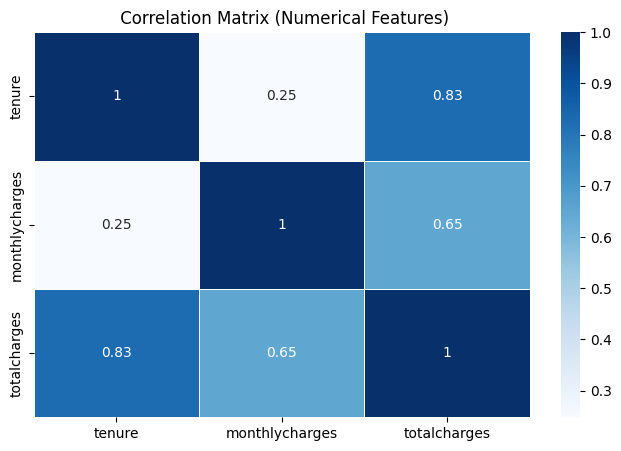

In [ ]:

# =============================================================================
# 📊 Step 5: Quick Understanding of Cleaned Dataset
# =============================================================================

#Shape of the dataset
print(f"Dataset contains {customer.shape[0]} rows and {customer.shape[1]} columns.\n")

#Missing values in dataset
print("Missing values in each column:\n")
print(customer.isnull().sum())

#datatypes of columns
print("Data type of columns: ")
customer.info()

# Summary statistics for numerical features
print("Summary Statistics (Numerical Features):\n")
display(customer.describe())

# Summary of categorical features
print("\n\nSummary of Categorical Features:\n")

for col in categorical_columns:
    print(f"\nValue Counts for '{col}':")
    print(customer[col].value_counts())
    print("-" * 40)

#Unique value counts in each column
print("\nNumber of Unique Values in Each Column:\n")
print(customer.nunique())

#Correlation heatmap for numerical columns
plt.figure(figsize=(8, 5))
sns.heatmap(customer.select_dtypes(include=['int64', 'float64']).corr(),
            annot=True, cmap='Blues', linewidths=0.5, linecolor='white')
plt.title(" Correlation Matrix (Numerical Features)")
plt.show()


#STEP : 06 Saving cleaned dataset

In [ ]:
# Save to CSV for portability
customer.to_csv("Cleaned_Telco_Customer_Churn.csv", index=False)
print("CSV version also saved as 'Cleaned_Telco_Customer_Churn.csv'")


# Save to Feather format for performance
customer.to_feather("Cleaned_Telco_Customer_Churn.feather")

print("Feather version saved as 'Cleaned_Telco_Customer_Churn.feather'")


CSV version also saved as 'Cleaned_Telco_Customer_Churn.csv'
Feather version saved as 'Cleaned_Telco_Customer_Churn.feather'
